Get dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('../song_features.csv')
df.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genres
0,0HZk0QsXPhMNAWNDR3rYE8,0.4700,0.364,0.378,0.0,7,0.3390,-7.381,0,0.0331,89.918,3,0.366,a-cappella
1,6tkbKjaHRL2ZG5wtmHzXgn,0.7640,0.556,0.412,0.0,7,0.0902,-10.224,1,0.0992,84.778,4,0.811,a-cappella
2,4z8sz6E4YyFuEkv5o7IJni,0.3020,0.497,0.312,0.0,11,0.0968,-9.088,0,0.0269,105.036,4,0.177,a-cappella
3,6XamqE26MOlAoXs1LZr8AU,0.3080,0.674,0.517,0.0,2,0.0896,-7.147,1,0.0555,120.127,4,0.476,a-cappella
4,5glU2EWqa5hpYqGPboSNjV,0.0243,0.419,0.817,0.0,2,0.2510,-4.704,1,0.0468,78.107,4,0.317,a-cappella


Histogram

array([[<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'valence'}>]], dtype=object)

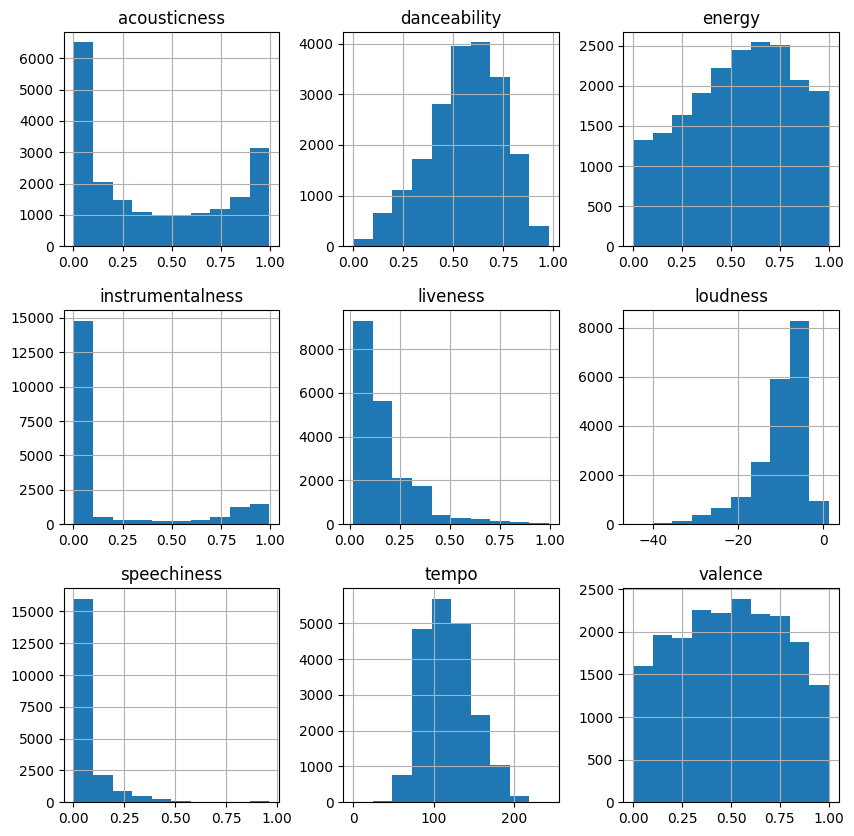

In [2]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df[features].hist(figsize=(10,10))

Heatmap

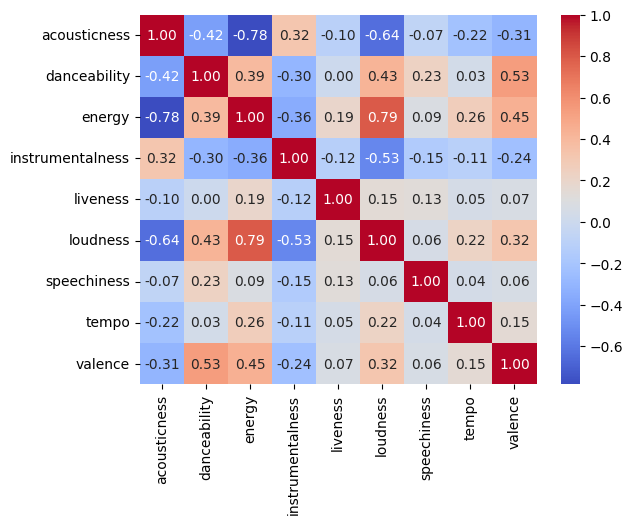

In [3]:
import seaborn as sns
dataplot = sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')

Box plot for features

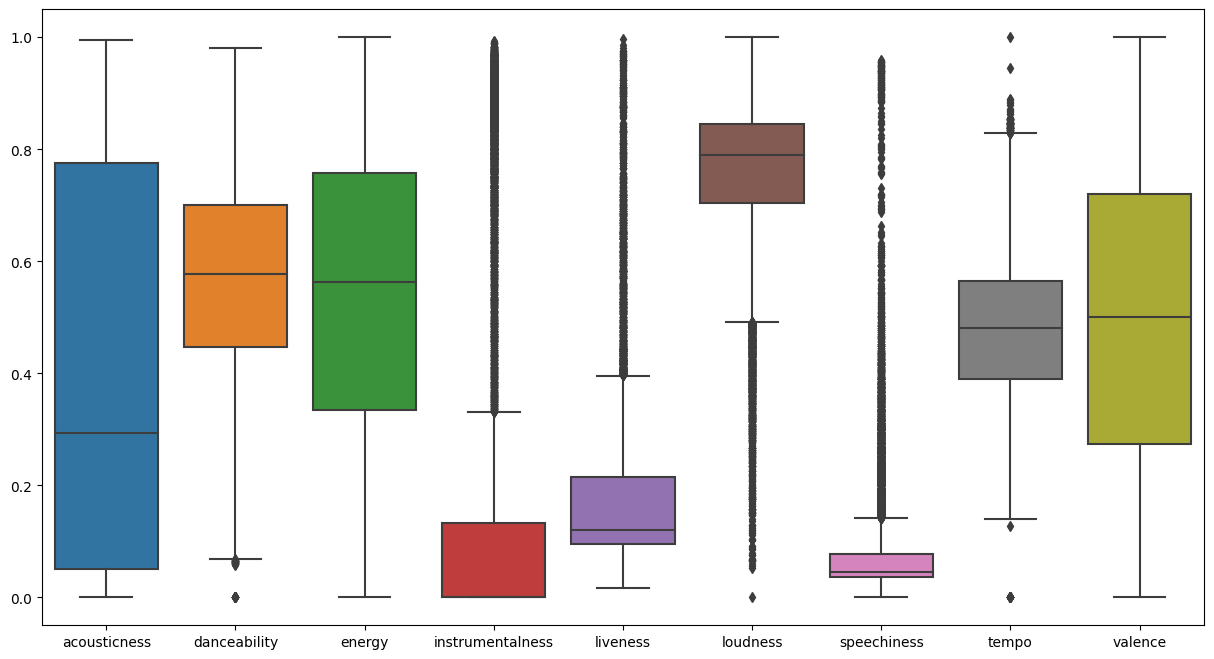

In [4]:

# Scale tempo and loudness to [0, 1]
for col in ['loudness', 'tempo']:
    df[col] = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))
sns.boxplot(data=df[features])
# Resize plot
plt.gcf().set_size_inches(15, 8)
plt.show()

Remove outliers

In [5]:
# Remove any data with tempo = 0
no_out_df = df[df['tempo'] != 0]
# Remove key, genres, id
no_out_df = no_out_df.drop(['key', 'id'], axis=1)
# # One hot encoding mode and time_signature
# no_out_df = pd.get_dummies(no_out_df, columns=['mode', 'time_signature'])
# # Rename time_signature columns
# no_out_df = no_out_df.rename(columns={'time_signature_0': 'ts_0/4', 'time_signature_1': 'ts_1/4', 'time_signature_3': 'ts_3/4', 'time_signature_4': 'ts_4/4', 'time_signature_5': 'ts_5/4'})
# Subset data to include only 500 songs per genre
sub_df = pd.DataFrame()
for genre in no_out_df['genres'].unique():
    sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
sub_df.drop(['genres'], axis=1, inplace=True)
sub_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_2396\3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
C:\Users\ACER\AppData\Local\Temp\ipykernel_2396\3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
C:\Users\ACER\AppData\Local\Temp\ipykernel_2396\3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
C:\Users\ACER\AppData\Local\Temp\ipykernel_2396\3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
10005,0.9040,0.144,0.346,0.000000,0.105,0.835954,1,0.0301,0.760285,3,0.211
239,0.0582,0.691,0.631,0.000000,0.169,0.813873,1,0.0377,0.386178,4,0.577
446,0.8280,0.694,0.393,0.000028,0.130,0.680151,1,0.2290,0.284051,4,0.747
10430,0.3960,0.580,0.485,0.000000,0.130,0.798234,1,0.0684,0.501516,4,0.649
247,0.4590,0.746,0.487,0.000000,0.271,0.776913,1,0.0290,0.443716,4,0.870


Clustering with Hierachical Clustering

In [6]:
import gower
from sklearn.cluster import AgglomerativeClustering
distance_matrix = gower.gower_matrix(sub_df)
distance_matrix

array([[0.        , 0.25913486, 0.22148186, ..., 0.29721215, 0.26279506,
        0.21604936],
       [0.25913486, 0.        , 0.15351072, ..., 0.28293964, 0.20701115,
        0.22840129],
       [0.22148186, 0.15351072, 0.        , ..., 0.21067052, 0.21126276,
        0.21988134],
       ...,
       [0.29721215, 0.28293964, 0.21067052, ..., 0.        , 0.11784994,
        0.14413579],
       [0.26279506, 0.20701115, 0.21126276, ..., 0.11784994, 0.        ,
        0.06629129],
       [0.21604936, 0.22840129, 0.21988134, ..., 0.14413579, 0.06629129,
        0.        ]], dtype=float32)

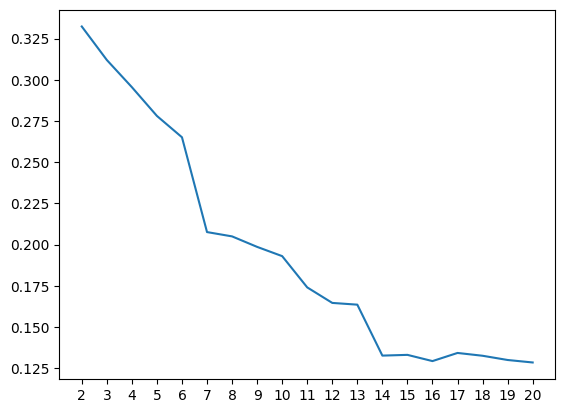

In [7]:
from sklearn.metrics import silhouette_score
# Find the best number of clusters by plotting a graph of silhouette score
scores = []
k_cand = range(2, 21)
for k in k_cand:
    model = AgglomerativeClustering(affinity='precomputed', linkage='complete', n_clusters=k)
    clusters = model.fit_predict(distance_matrix)
    score = silhouette_score(distance_matrix, clusters, metric='precomputed')
    scores.append(score)
plt.xticks(k_cand)
plt.plot(k_cand, scores)

In [8]:
model = AgglomerativeClustering(affinity='precomputed', linkage='complete', n_clusters=3)
clusters = model.fit_predict(distance_matrix)
sub_df['clusters'] = clusters
sub_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,clusters
10005,0.9040,0.144,0.346,0.000000,0.105,0.835954,1,0.0301,0.760285,3,0.211,1
239,0.0582,0.691,0.631,0.000000,0.169,0.813873,1,0.0377,0.386178,4,0.577,1
446,0.8280,0.694,0.393,0.000028,0.130,0.680151,1,0.2290,0.284051,4,0.747,1
10430,0.3960,0.580,0.485,0.000000,0.130,0.798234,1,0.0684,0.501516,4,0.649,1
247,0.4590,0.746,0.487,0.000000,0.271,0.776913,1,0.0290,0.443716,4,0.870,1


Investigate the clusters

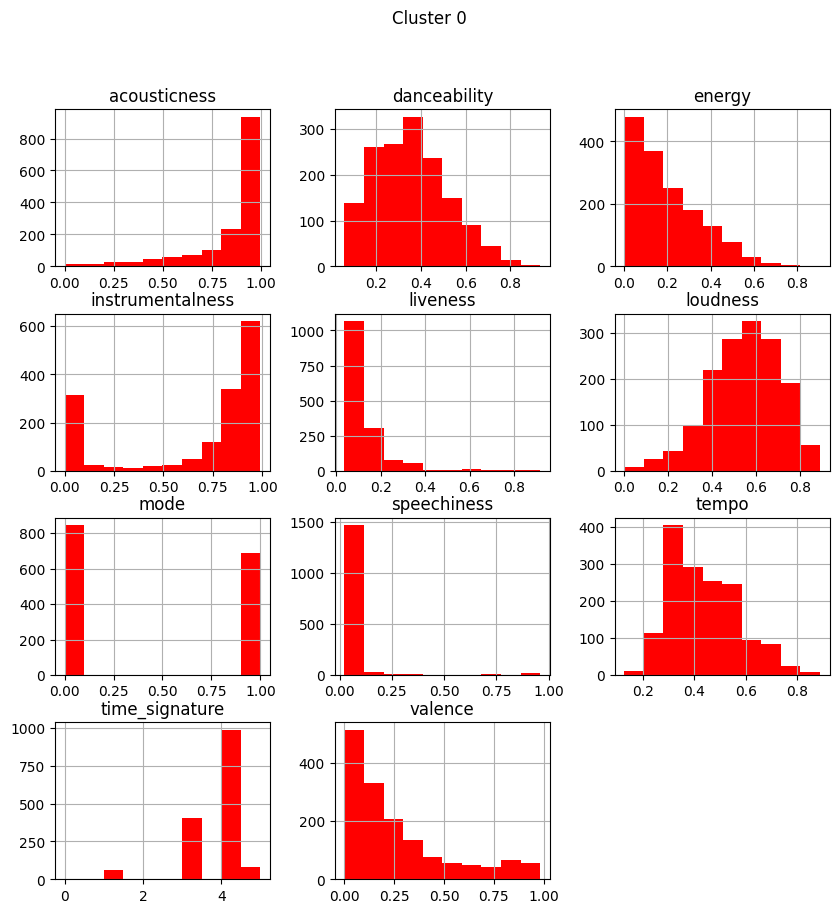

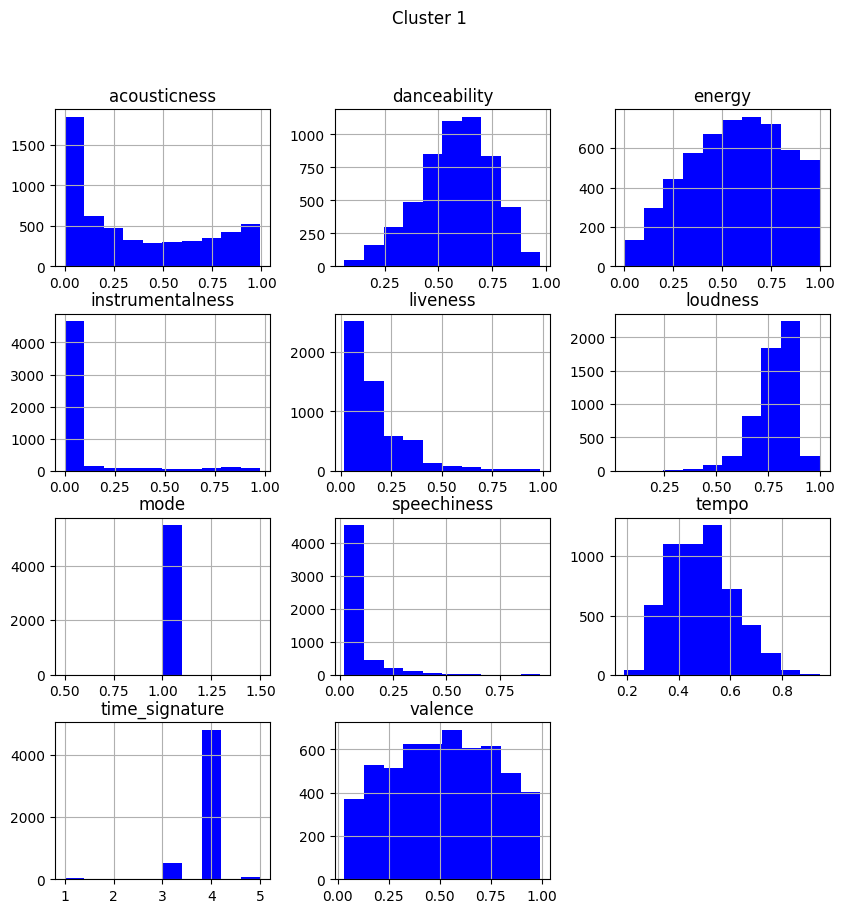

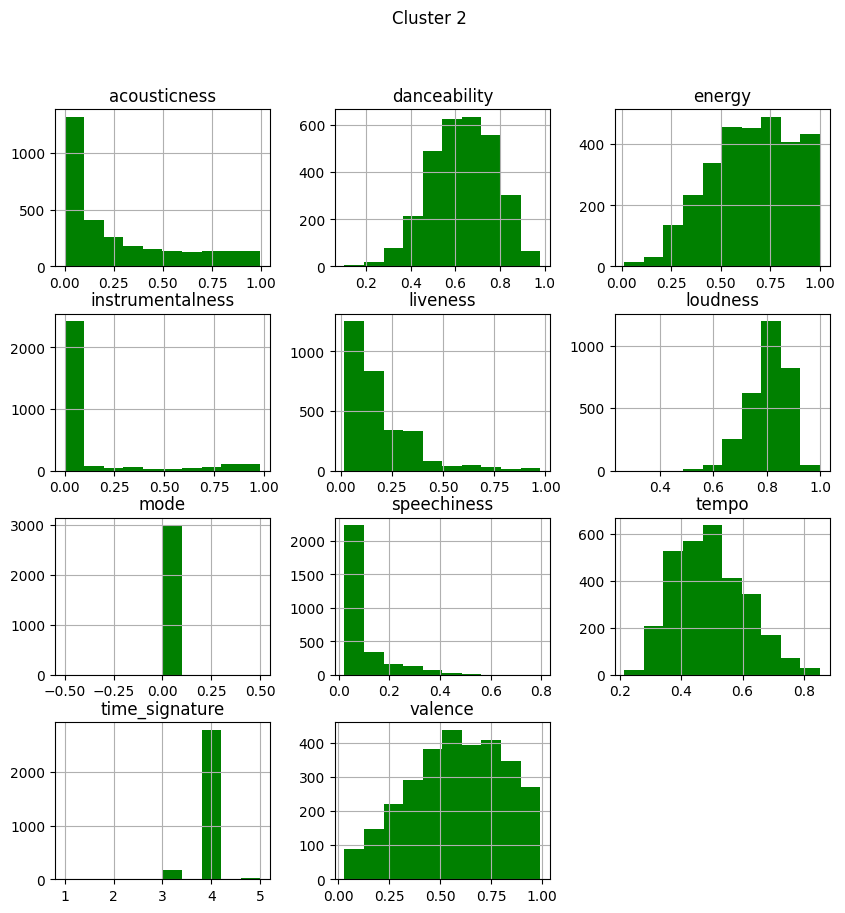

In [9]:
# Plot histogram for each feature in each cluster
plot_features = sub_df.drop(['clusters'], axis=1).columns
for k in range(0, 3):
    color = ['red', 'blue', 'green']
    sub_df[sub_df['clusters'] == k][plot_features].hist(figsize=(10,10), color=color[k])
    plt.suptitle('Cluster ' + str(k))

Investigate the difference between clusters

In [10]:
# TODO

Approach #2: Clustering using K-medoids

Scaling numerical features

In [14]:
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
df[features][:2]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.470,0.364,0.378,0.0,0.3390,0.810793,0.0331,0.369467,0.366
1,0.764,0.556,0.412,0.0,0.0902,0.749127,0.0992,0.348347,0.811


In [17]:
# Standard Scaled "mean normalisation"
scaler = StandardScaler()
scaler.fit(df[features])
numerical_data  = scaler.transform(df[features])
numerical_data  = pd.DataFrame(numerical_data , columns=features)
numerical_data[:2]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.178781,-1.077194,-0.612176,-0.551999,1.134989,0.424712,-0.485068,-0.936255,-0.48845
1,0.990520,-0.035555,-0.485062,-0.551999,-0.616902,-0.034956,0.159209,-1.107074,1.17517


In [16]:
# MinMax scaled
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[features])
numerical_data  = scaler.transform(df[features])
numerical_data = pd.DataFrame(numerical_data,index=df.index,columns=features)
numerical_data[:2]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.471887,0.371429,0.377521,0.0,0.328366,0.810793,0.034479,0.369467,0.366
1,0.767068,0.567347,0.411547,0.0,0.074411,0.749127,0.103333,0.348347,0.811


Sacling categorical features: ordinal & nominal

In [ ]:
# what am i supposed to do with this? above is all numerical data

Final Datasets used for clustering

In [20]:
# transformed and scaled dataset
Xy_scaled  = pd.concat([numerical_data], axis=1)
print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

# original dataset
Xy_original = df[features]

Data min:max (-5.619032099619876, 8.54943756084064)


Clustering using K-medoids

In [22]:
#import kmedoids
from pyclustering.cluster.kmedoids import kmedoids
from scipy.spatial.distance import pdist,squareform

mhv = pdist(Xy_scaled, 'cityblock',)
mh = squareform(mhv,force='tomatrix')
print(f"Data shape: {Xy_original.shape}\nMatrix shape: {mh.shape}")
pd.DataFrame(mh[:3,:3])

Data shape: (20000, 9)
Matrix shape: (20000, 20000)


,0,1,2
0,0.000000,6.670768,4.682991
1,6.670768,0.000000,5.947829
2,4.682991,5.947829,0.000000


In [23]:
# find k clusters
results_kmedoids = dict()

k_cand = [3,6]

for k in k_cand:
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,1000,size=k)
    kmedoids_instance = kmedoids(mh, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    %time kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    score1 = silhouette_score(mh, cluster_array, metric='precomputed')
    score2 = silhouette_score(Xy_scaled, cluster_array,metric='correlation')
    
    # store
    results_kmedoids[k] = {'k':cluster_array,'s1':score1,'s2':score2}

fig,axs = plt.subplots(1,1,figsize=(16,5))
axs.plot([i for i in results_kmedoids.keys()],[i['s1'] for i in results_kmedoids.values()],'o-',label='Minkowski')
axs.plot([i for i in results_kmedoids.keys()],[i['s2'] for i in results_kmedoids.values()],'o-',label='correlation')
axs.set_xticks(k_cand)
axs.set_xlabel('K')
axs.legend()

CPU times: total: 6min 59s
Wall time: 7min 5s
